In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import network_generation as homomul
import spread_simulation
import homophily_multi_attr_viz as homomul_viz

In [21]:
model_settings = {
    'N': 3200, 
    'm': 5, 
    'consolidation_param': 0.1,
    'marginal_distribution': [[0.5,0.5],[0.5,0.5]], 
    'homophily': 0.8, 
    'complex_threshold': 0.16
}

experiment_settings = {
    'n_networks': 2,
    'n_initial_seeds': 5
}

def perform_experiment(N: int, m: int, consolidation_param: float, homophily: float,
                       marginal_distribution: list = [[0.5,0.5],[0.5,0.5]], complex_threshold: float = 0.16,
                       n_networks: int = 3, n_initial_seeds: int = 10) -> list[float]: 
    
    comp_pop_frac_tnsr = homomul.consol_comp_pop_frac_tnsr(marginal_distribution, consolidation_param)

    h1 = np.array([[homophily, 1-homophily], [1-homophily, homophily]])
    h2 = h1.copy()
    h_mtrx_lst = np.array([h1,h2])

    results = []

    for _ in range(n_networks): 
        g = homomul.am_v2(
                    h_mtrx_lst,
                    comp_pop_frac_tnsr,
                    homophily_kind='all',
                    directed=False,
                    pop_fracs_lst = marginal_distribution,
                    N=N,
                    m=m
                    )
        
        initial_seeds = np.random.choice(g.nodes, n_initial_seeds, replace=False)
        for initial in initial_seeds: 
        
            initial = [initial] + [x for x in g.neighbors(initial)]
            g = spread_simulation.complex_spread(g, initial, complex_threshold)
            results.append(spread_simulation.fraction_infected(g))

    return np.average(results), np.average([x > 0.9 for x in results])

perform_experiment(**model_settings, **experiment_settings)

(0.20678125, 0.2)

In [22]:
homophily_settings = np.linspace(0,1,11)
consolidation_settings = np.linspace(0,0.5, 6)

results_average = np.zeros((homophily_settings.size, consolidation_settings.size))
results_global_spread = np.zeros((homophily_settings.size, consolidation_settings.size))

for i, homophily in enumerate(homophily_settings): 
    for j, consolidation_param in enumerate(consolidation_settings):

        model_settings['homophily'] = homophily
        model_settings['consolidation_param'] = consolidation_param

        r_average, r_global_spread = perform_experiment(**model_settings, **experiment_settings)
        print(f'homophily: {homophily:.2f} / consolidation: {consolidation_param:0.2f} => average = {r_average:0.2f}; global = {r_global_spread:0.2f}')

        results_average[i, j] = r_average
        results_global_spread[i, j] = r_global_spread


homophily: 0.0 / consolidation: 0.00 => average = 0.01; global = 0.00
homophily: 0.0 / consolidation: 0.10 => average = 0.01; global = 0.00
homophily: 0.0 / consolidation: 0.20 => average = 0.04; global = 0.00
homophily: 0.0 / consolidation: 0.30 => average = 0.12; global = 0.00
homophily: 0.0 / consolidation: 0.40 => average = 0.20; global = 0.00
homophily: 0.0 / consolidation: 0.50 => average = 0.16; global = 0.00
homophily: 0.1 / consolidation: 0.00 => average = 0.01; global = 0.00
homophily: 0.1 / consolidation: 0.10 => average = 0.31; global = 0.30
homophily: 0.1 / consolidation: 0.20 => average = 0.90; global = 0.90
homophily: 0.1 / consolidation: 0.30 => average = 0.50; global = 0.50
homophily: 0.1 / consolidation: 0.40 => average = 0.01; global = 0.00
homophily: 0.1 / consolidation: 0.50 => average = 0.01; global = 0.00
homophily: 0.2 / consolidation: 0.00 => average = 0.01; global = 0.00
homophily: 0.2 / consolidation: 0.10 => average = 0.01; global = 0.00
homophily: 0.2 / con

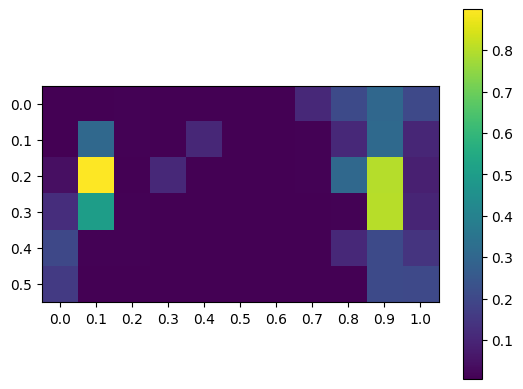

In [25]:
plt.imshow(results_average.T, interpolation='nearest')
plt.xticks(np.arange(homophily_settings.size), [f'{x:0.1f}' for x in homophily_settings])
plt.yticks(np.arange(consolidation_settings.size), [f'{x:0.1f}' for x in consolidation_settings])
plt.colorbar()
plt.show()

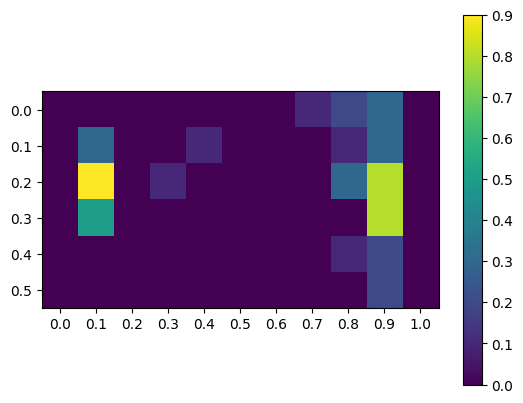

In [26]:
plt.imshow(results_global_spread.T, interpolation='nearest')
plt.xticks(np.arange(homophily_settings.size), [f'{x:0.1f}' for x in homophily_settings])
plt.yticks(np.arange(consolidation_settings.size), [f'{x:0.1f}' for x in consolidation_settings])
plt.colorbar()
plt.show()